# Task 1: Análisis exploratorio de los datos

In [1]:
import os
from pathlib import Path

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_RAW = Path("../data")

In [3]:
def file_df(path, filename, sep):
        """Method to load files with the correct separator

        Args:
            path ([str]): path to the raw data files
            filename ([str]): name of the txt file to be opened

        Returns:
            [Dataframe]: dataframe created from the file
        """
        return pd.read_csv(Path(path) / filename, sep)

In [4]:
df_train = file_df(DATA_RAW,'j0001_train.csv',',') 
df_test = file_df(DATA_RAW,'j0001_X_test.csv',',') 

In [5]:
# Comprobamos el tipo de datos
df_train.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
target      float64
dtype: object

In [6]:
# Número totoal de filas y columnas
print("shape train dataset: ", df_train.shape)

# Duplicados
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


shape train dataset:  (2100, 5)
number of duplicate rows:  (0, 5)


In [7]:
# Valores nulos
print(df_train.isnull().sum())

feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


<AxesSubplot:>

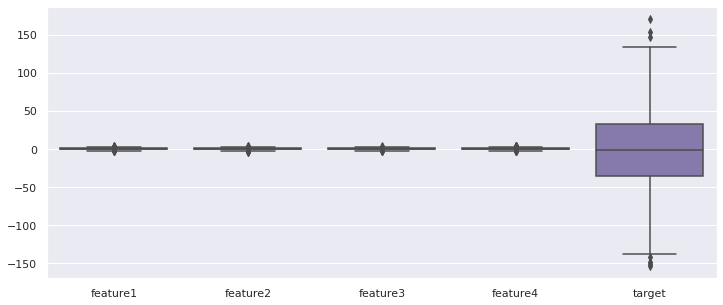

In [8]:
# Boxplot + target
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train)

<AxesSubplot:>

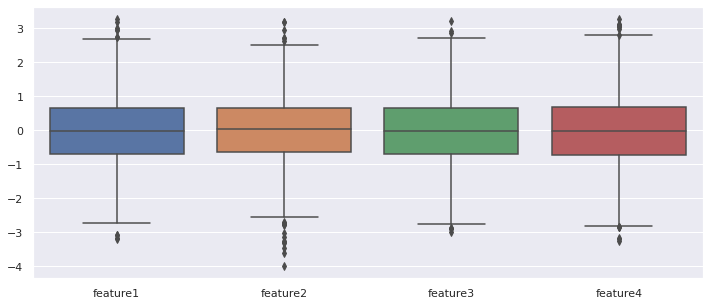

In [9]:
# Boxplot sin target
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train.iloc[:, 0:4])

In [10]:
# Cuantiles
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature1     1.376119
feature2     1.302568
feature3     1.378272
feature4     1.407640
target      68.778594
dtype: float64


In [11]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)



,variable_1,variable_2,r,abs_r
14,feature3,target,0.786433,0.786433
22,target,feature3,0.786433,0.786433
20,target,feature1,0.563765,0.563765
4,feature1,target,0.563765,0.563765
9,feature2,target,0.216776,0.216776
21,target,feature2,0.216776,0.216776
1,feature1,feature2,0.031671,0.031671
5,feature2,feature1,0.031671,0.031671
7,feature2,feature3,-0.020254,0.020254
11,feature3,feature2,-0.020254,0.020254


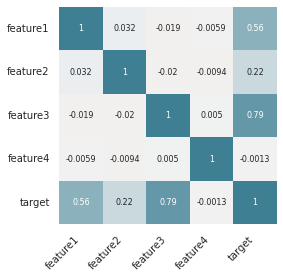

In [12]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [13]:
# Correlaciones
df_num_corr = df_train.corr()['target'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with target:
feature3    0.786433
feature1    0.563765
Name: target, dtype: float64


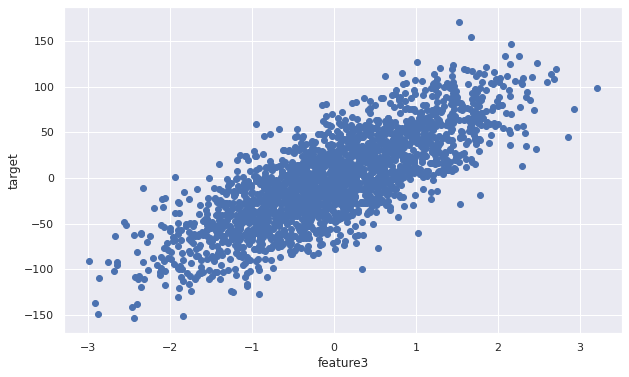

In [14]:
# Scatter plot de las variables correlacionadas con el target
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_train['feature3'], df_train['target'])
ax.set_xlabel('feature3')
ax.set_ylabel('target')
plt.show()

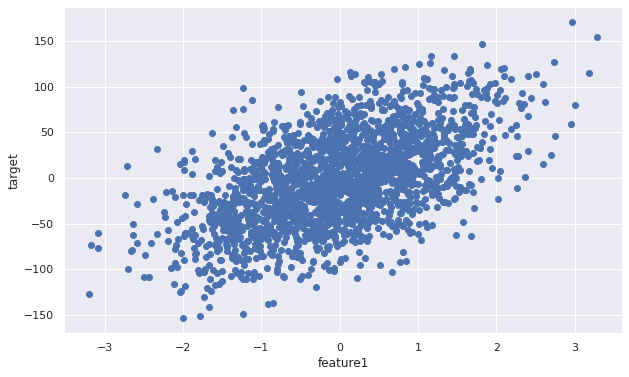

In [15]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_train['feature1'], df_train['target'])
ax.set_xlabel('feature1')
ax.set_ylabel('target')
plt.show()

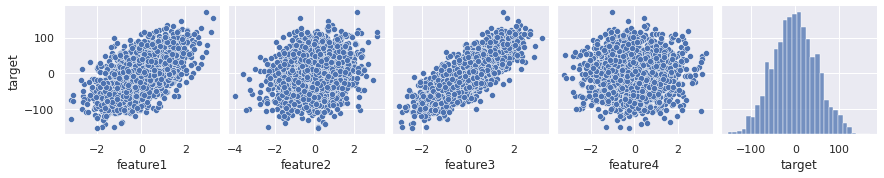

In [16]:
for i in range(0, len(df_train.columns), 5):
    sns.pairplot(data=df_train,
                x_vars=df_train.columns[i:i+5],
                y_vars=['target'])

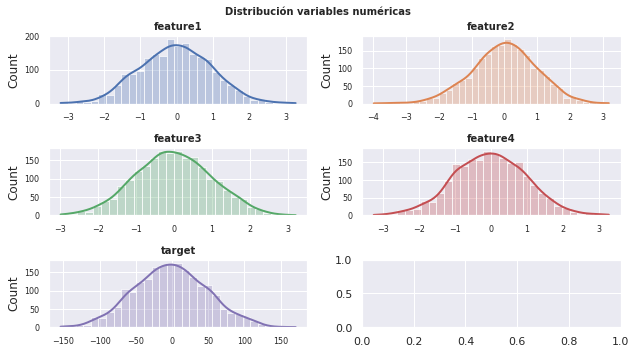

In [17]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_train.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_train,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Task 2:  Predecir los valores target con un modelo basado regresión lineal.

In [18]:
# Separamos las variables del target
X = df_train.iloc[:,0:4]
y = df_train['target']

In [19]:
# Ejecutamos el modelo
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [20]:
# Si quisiésemos hacer una comprobación con el conjunto de test:
# División de los datos 
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_pred = linreg.predict(X_test)

In [21]:
print('R2: ', metrics.r2_score(y_test,y_pred))
print('MSE: ', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE: ', metrics.mean_squared_error(y_test,y_pred))
# print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

R2:  1.0
MSE:  3.215264033853839e-14
RMSE:  1.6538583054422492e-27
